<a href="https://colab.research.google.com/github/sling1678/ML_programs_for_video_lectures/blob/main/classification_by_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The General Classification Problem

Let target variable $y$ be any of $K$ possible classes, which we can denote by $c_1, c_2, \cdots, c_K$. Then, very general arguments lead to the following solution of the optimization problem. 

$$ y_{\text{pred}} = \text{max}\ Pr(y|x) $$

Here we have $K$ probability mass functions corresponding to $K$ classes for $y$, namely, $Pr(y=c_1|x)$, $Pr(y=c_2|x)$, $\cdots$, $Pr(y=c_K|x)$. Basically, we predict the class that corresponds to the highest probability given the predictor $x$. 

$\textbf{Logistic Regression - Multivariate}$

Logistic Regression models this probability directly by assuming that natural log of odds ratios be a linear function of the predictor variables. Say, we pick ratio of all other probabilities with the $Pr(y=c_K|x)$, we will get $K-1$ natural log odd ratios, which can model with linear functions.

$$ \ln\ \frac{ Pr(y=c_1|x)}{Pr(y=c_K|x)} = w_{10} + \sum_{j=1}^p w_{1j} x_{j} \equiv f_1(x, w)$$
$$ \ln\ \frac{ Pr(y=c_2|x)}{Pr(y=c_K|x)} = w_{20} + \sum_{j=1}^p w_{2j} x_{j} \equiv f_2(x, w) $$
$$\cdots$$
$$ \ln\ \frac{ Pr(y=c_{(K-1)}|x)}{Pr(y=c_K|x)} = w_{(K-1)0} + \sum_{j=1}^p w_{(K-1)j} x_{j}\equiv f_{K-1}(x, w) $$

Exponentiating and then using the sum of all probabilities to equal 1 immediately gives us models of all probabilities.

$$ Pr(y=c_1|x) = \frac{\exp({f_1(x,w)})}{Z}$$
$$ Pr(y=c_2|x) = \frac{\exp({f_2(x,w)})}{Z} $$
$$\cdots$$
$$ Pr(y=c_{(K-1)}|x) = \frac{\exp({f_{(K-1)}(x,w)})}{Z} $$
$$ Pr(y=c_K|x) = 1 - \sum_{j=1}^{K-1} Pr(y=c_j|x)  $$
$$ Z = 1 + \sum_{j=1}^{K-1} \exp({f_j(x,w)}) $$
$$ f_j(x,w) = w_{j0} + \sum_{a=1}^p w_{1a} x_{a}, \ \ j = 1, 2, \cdots, (K-1) $$

## Maximum Likelihoood Estimation of Parameters from Data

Suppose we have $N$ points of independently and identically obtained (IID) data, $\mathcal{D} = \{(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N) \}$, where $x_i\in R^p$ and $y_i \in C=\{ c_1, c_2, \cdots, c_K \}$. We will represent $y_i$ as a $K$-dimensional vector with entry $1$ for the class of data $y_i$ and zero for other components. Thus, in a $5$-class example, if $y_i = c_2$, then this $y_i$ will be represented by the following vector.

$$ y_i = [0, 1, 0, 0, 0]^T, $$

where I have placed $T$ to indicate that we will think of vectors as column vectors. 

From the discussion above, we know that there are $(p+1)(K-1)$ parameters $w$. We estimate them by $\textbf{maximum likelihood principle}$. According to this principle, among all $N$-point data that could have been obtained, the data $\mathcal{D}$ observed is the one that has the highest probability. That is, parameters $w$ should be such that the joint conditional probability of obtaining $N$ data points is largest. This joint probability when looked as a function of parameters $w$ is called $\textbf{likelihood}$. We will denote likelihood be $L$. Since the data points are $\textbf{assumed to be independent}$,

$$
L(w;\mathcal{D}) = Pr \left(y_1, y_2, ..., y_N|x_1, x_2, ..., x_N; w\right) = Π_{i=1}^N Pr(y_i|x_i; w). 
$$

Since we have a product on the right side, it would turn into a sum if we took log of both sides. And since $log(f(w))$ is monotonic in $f(w)$, the value of $w$ at which maximum of $log(f(w))$ occurs will also be the place where the maximum of $f(w)$ will occur. Thus, we deal with $\textbf{log-likelihood}$, which we will denote by $\mathcal{L}$.

$$
\mathcal{L}(w; \mathcal{D}) = \ln L(w; \mathcal{D}) = \sum_{i=1}^N \ln Pr(y_i|x_i; w).
$$

Then the $\textbf{most likelihood estimate (MLE)}$ of parameters $w$ of the model of conditional probability is obtaine by solving $(p+1)(K-1)$ equations, 

$$
\frac{\partial \mathcal{L}(w; \mathcal{D})}{\partial w_{ia}},\ \ \ i=1,2, ..., K-1,\ \ a=0,1,2,...,p.$$




## Logistic Regression for Binary Classification:

If you have just two classes, we say the problem is binary classification. In that case, we need model only one of the two probability mass functions. Suppose the two classes are represented by integers zero and one. Then, we traditionally model the probability of the class with $y=1$ with $p+1 = (p+1)(2-1)$ parameters $w_0, w_1, w_2, \cdots, w_p$.

$$Pr(y=1|x;w) = \frac{ e^{w_0 + \sum_{a=1}^p w_{a} x_{a}} }{ 1 + e^{w_0 + \sum_{a=1}^p w_{a} x_{a}} } = \left( 1 + e^{-w_0 - \sum_{a=1}^p w_{a} x_{a}} \right)^{-1} \ \ \ (1)$$

Then, log likelihood will be
$$
\mathcal{L}(w; \mathcal{D}) = \sum_{i=1}^N \ln Pr(y_i|x_i; w).\ \ \  (2)
$$

Now, a trick for $Pr(y_i|x_i; w)$ in the case of $[0,1]$ choices for $y_i$ works out.

$$
Pr(y_i|x_i; w) = Pr(y=1|x_i;w)^{y_i} \times \left[ 1 - Pr(y=1|x_i;w)\right]^{1-y_i}\ \ \ (3)
$$

You can easily check this by working out what happens when $y_i=1$ and when $yi=0$, you should get the right probability. Use (3) in (2) and then using log we get

$$
\mathcal{L}(w; \mathcal{D}) = \sum_{i=1}^N  \left( y_i\ \ln Pr(y=1|x_i;w) + (1-y_i)\ \ln \left[ 1 - Pr(y=1|x_i;w)\right]\right) .\ \ \  (4)
$$

To simplify the calculation, when we use model in (1), let us use $f(x_i,w) = w_0 +  \sum_{a=1}^p w_{a} x_{ia}$. 

$$
\mathcal{L}(w; \mathcal{D}) = \sum_{i=1}^N  \left[ y_i f(x_i,w) - y_i \ln\left( 1 + e^f\right)  - (1-y_i)\ln\left( 1 + e^f\right) \right].\ \ \  (4)
$$

This simplifies to

$$
\mathcal{L}(w; \mathcal{D}) = \sum_{i=1}^N  \left[ y_i f(x_i,w)   - \ln \left( 1 + e^{f(x_i;w)}\right) \right].\ \ \  (4)
$$

Now, to optimize this, we take derivative with respect to $w_j$.

$$
\frac{\partial \mathcal{L}}{\partial w_j} = \sum_{i=1}^N  \left[ y_i    - \frac{e^{f(x_i;w)}}{ \left( 1 + e^{f(x_i;w)}\right) }\right]\frac{\partial f}{\partial w_j} = 0, \ \ \ (5)
$$

with
$$
\frac{\partial f}{\partial w_0} = 1,\ \ \frac{\partial f}{\partial w_a} = x_{ia}, \ \ a=1, 2, ..., p.
$$

Writing (5) explictily, we have one equation for $w_0$ and one for each of the $w_a, a=1,..,p$.

$$
\sum_{i=1}^N  \left[ y_i    - \frac{e^{f(x_i;w)}}{ \left( 1 + e^{f(x_i;w)}\right) }\right] = 0\ \ \ (6a)
$$

$$
\sum_{i=1}^N  \left[ y_i    - \frac{e^{f(x_i;w)}}{ \left( 1 + e^{f(x_i;w)}\right) }\right] x_{ia}= 0, \ \  (6b)
$$


Suppose we introduce $x_{i0}=1$ for all $i$, then we can think of $w$ and $x$ as $(p+1)$-dimensional vectors and use vector notation to write the expressions compactly.

$$
\frac{\partial \mathcal{L}}{\partial w_j}  =\sum_{i=1}^N  \left[ y_i    - \frac{e^{f(x_i;w)}}{ \left( 1 + e^{f(x_i;w)}\right) }\right] x_{i}= 0,\ \ \ f(x_i,w) = w^T x_i\ \ \ (6c)
$$

Solving these $(p+1)$ equations analytically is not possible. We solve them iteratively. Many of the iterative algorithms that are implemented in standard packages, are set for minimizing an error function, which measures error per sample. By multiplying $\mathcal{L}$ by minus 1 and dividing by $N$, we can turn it into an error function that we minimize.

$$
E(w; \mathcal{D}) = -\frac{\mathcal{L}(w; \mathcal{D})}{N},\ \ \  (7a)
$$
and its derivatives will be
$$
\frac{\partial E}{\partial w_j}  = -\frac{1}{N}\sum_{i=1}^N  \left[ y_i    - \frac{e^{f(x_i;w)}}{ \left( 1 + e^{f(x_i;w)}\right) }\right] x_{i,j}= 0,\ \ \ f(x_i,w) = w^T x_i\ \ \ (7b)
$$

Then, minimum of $E$ in the $(p+1)$-dimensional $w$-space can be achievely iteratively by updating $w_0, w_1, ..., w_p$ by the following update rule, where $t$ is iteration index.

$$
w_j(t+1) = w_j(t) - \eta \times \frac{\partial E}{\partial w_j},\ \ \ w_j(0) = \text{random}, 
$$
where $\eta$ is called $\textbf{learning rate}$. 


 




# Thinking of a two-class Logistic Regression as a Neural Network

It is very direct to think of logistic regression as a neural network. You need input layer with $p+1$ units for $x_0=1$ and the $x_1$ through $x_p$. The feed into one output unit with sigmoid activation function. This represents
$$
\text{output} = \text{sigmoid}(f(x,w)),
$$
where $\text{sigmoid}(f)$ is
$$
\text{sigmoid}(f) = \frac{e^f}{1 + e^f} = \frac{1}{1 + e^{-f}}, 
$$
with
$$
f = w_0 x_0 + \sum_{a=1}^p w_a x_a.
$$
This output is same as probability for one example given in (1) above. The error measure in (7) above is called $\textbf{binary cross entropy}$, which is written using (4) for the log likelihood.
$$
E = -\frac{1}{N} \sum_{i=1}^N \sum_{i=1}^N  \left[ y_i f(x_i,w)   - \ln \left( 1 + e^{f(x_i;w)}\right) \right].
$$
An advantage of using this as a neural network problem is that there are several frameworks where derivative needed for updating the weights in the iterative solution is already implemented in very efficient way. 

## Using keras to implement Logistic Regression Below



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split


# Illustrate Binary Classification Using Titanic Data using TensorFlow/Keras
### We will get the data from tensorflow_datasets
### Select three features, age, pclass, sex; target is scalar survived.
### The classes in survived are already coded as 0/1
### sex is categorical and also coded 0/1

## NOTE: I will be leaving out Data Exploratory work here



In [2]:
#Global Constants
TARGET='survived'

In [3]:
def load_data(verbose=0, dataset_name='titanic', split='train', shuffle=True):
  ds = tfds.load(dataset_name, split=split, shuffle_files=shuffle)
  df = tfds.as_dataframe(ds)
  if verbose == 1:
    print(f"df: {df.shape}")
  return df

def clean_data(df):
  # Bad data clean
  df = df.drop(df[df['features/age'] < 0].index)
  return df

def get_data(verbose=0, dataset_name='titanic', split='train', shuffle=True):
  df = load_data(verbose, dataset_name, split, shuffle)
  df = clean_data(df)
  return df

def get_some_stats_about_df(df, target):
  print(f"Distribution of data among classes is:\n{df[target].value_counts()}")
  print(f"total number of missing or NANs:\n{df.isnull().sum()}")
  print(f"Statistical Description: {df.describe()}")
  
def train_val_test_split(df, val_frac=0.2, test_frac=0.2, verbose=0):
  val_idx_begin = int( (1.0-val_frac-test_frac)*len(df) )
  test_idx_begin = int( (1.0 - test_frac)*len(df) )
  train, val, test = np.split(df.sample(frac=1),[val_idx_begin, test_idx_begin])
  if verbose != 0:
    print(f"train: {train.shape}, val: {val.shape}, test: {test.shape}")

  return train, val, test

#---------------------
if True:
  df= get_data(verbose=1)
  get_some_stats_about_df(df, target=TARGET)
  train, val, test = train_val_test_split(df, val_frac=0.2, test_frac=0.2, verbose=1)
 


df: (1309, 14)
Distribution of data among classes is:
0    619
1    427
Name: survived, dtype: int64
total number of missing or NANs:
features/age          0
features/boat         0
features/body         0
features/cabin        0
features/embarked     0
features/fare         0
features/home.dest    0
features/name         0
features/parch        0
features/pclass       0
features/sex          0
features/sibsp        0
features/ticket       0
survived              0
dtype: int64
Statistical Description:        features/age  features/body  features/embarked  features/fare  \
count   1046.000000    1046.000000        1046.000000    1046.000000   
mean      29.881136      17.570746           1.548757      36.650051   
std       14.413500      61.317171           0.810820      55.718048   
min        0.166700      -1.000000           0.000000      -1.000000   
25%       21.000000      -1.000000           1.250000       8.050000   
50%       28.000000      -1.000000           2.000000      1

In [4]:
def df_to_dataset(df, target, shuffle=True, batch_size=32, verbose=0):
  """
  Boilerplate pandas.DataFrame to tf.data.Dataset object
  """
  df = df.copy()
  labels = df.pop(target)
  labels = labels.squeeze()
  labels = labels[:, tf.newaxis]
  #df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  df = {key: value.squeeze()[:, np.newaxis] for key, value in df.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  
  # ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)

  if verbose != 0:
    [(features, labels)] = ds.take(1)
    print('Every feature:', list(features.keys()))
    print('A batch of ages:', features['features/age'])
    print('A batch of labels:', labels )

  return ds

def prepare_train_val_test_ds(df, target, shuffle=True, 
  val_frac=0.2, test_frac=0.2, batch_size=4, verbose=0):

  train, val, test = train_val_test_split(df, val_frac=0.2, test_frac=0.2, verbose=0)
  train_ds = df_to_dataset(train, target, batch_size=batch_size)
  val_ds = df_to_dataset(val, target, shuffle=False, batch_size=batch_size)
  test_ds = df_to_dataset(test, target, shuffle=False, batch_size=batch_size)

  if verbose != 0:
    for xy in train_ds.take(1):
      print(xy)
  return train_ds, val_ds, test_ds

def test_prepare_ds():
  df= get_data(verbose=0)
  _, _, _ = prepare_train_val_test_ds(df, target='survived', shuffle=True, 
  val_frac=0.2, test_frac=0.2, batch_size=2, verbose=1)

if True:
  test_prepare_ds()
 

({'features/age': <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[45.],
       [37.]], dtype=float32)>, 'features/boat': <tf.Tensor: shape=(2, 1), dtype=string, numpy=
array([[b'Unknown'],
       [b'Unknown']], dtype=object)>, 'features/body': <tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[-1],
       [-1]], dtype=int32)>, 'features/cabin': <tf.Tensor: shape=(2, 1), dtype=string, numpy=
array([[b'T'],
       [b'Unknown']], dtype=object)>, 'features/embarked': <tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[2],
       [2]])>, 'features/fare': <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[35.5   ],
       [ 9.5875]], dtype=float32)>, 'features/home.dest': <tf.Tensor: shape=(2, 1), dtype=string, numpy=
array([[b'Trenton, NJ'],
       [b'Unknown']], dtype=object)>, 'features/name': <tf.Tensor: shape=(2, 1), dtype=string, numpy=
array([[b'Blackwell, Mr. Stephen Weart'],
       [b'Laitinen, Miss. Kristina Sofia']], dtype=object)>, 'features/parch': <tf.Tensor: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


## Build a tf.data Pipeline
### We need (1) to normalize the numerical features (2) convert an int64 data into one-hot categories.
### Do these by using Keras Processing Layers - takes care of automatically applying the same transformations to val and test sets.

Adapted from: 
https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers

## First choose features of interest. Make lists of numerical feartures and categorical features so you can write transforms of each or any other processing you want to do to them before feeding into your model. 

In [5]:
#Numerical Features
numerical_features = ["features/age",]
#Categorical Features
categorical_features=["features/pclass", "features/sex"]

In [6]:
# Normalizing a numerical column
def get_normalization_layer(feature_name, dataset):
  """
  Boilerplate code for creating a normalization layer using keras.layers.Normalization().
  This is called on each numerical feature. So, we need to have a list of numerical
  features we will apply this transformation to.
  """
  
  normalizer = tf.keras.layers.Normalization(axis=None)
  feature_ds = dataset.map(lambda x, y: x[feature_name]) # get the ds column
  normalizer.adapt(feature_ds) # learn the statistics during training
  
  return normalizer

def test_get_normalization_layer():
  df= get_data(verbose=0)
  train_ds, _, _ = prepare_train_val_test_ds(df, target='survived', shuffle=True, 
  val_frac=0.2, test_frac=0.2, batch_size=2, verbose=0)  

  feature_name = "features/age"
 
  age_col = np.expand_dims(df[feature_name], axis=-1)
  age_input = tf.keras.Input(shape=(1,), name=feature_name, dtype="int64")
  age_layer= get_normalization_layer(feature_name, train_ds)
  # feed input into layer
  age_encoded = age_layer(age_col)

  print(f"age column's shape = {age_col.shape}")
  print(f"age_encoded's shape = {age_encoded.shape}")

#-----------------Test this
if True:
  test_get_normalization_layer()
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


age column's shape = (1046, 1)
age_encoded's shape = (1046, 1)


In [7]:
def get_category_encoding_layer(feature_name, dataset, dtype, max_tokens=None):
  """
  Boilerplate code for encoding categorical features. These features can be as 
  finite number of string labels, in which case must assign max_tokens
  """
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = tf.keras.layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = tf.keras.layers.IntegerLookup(max_tokens=max_tokens)
  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[feature_name])
  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)
  # Encode the integer indices.
  encoder = tf.keras.layers.CategoryEncoding(num_tokens=index.vocabulary_size())
  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

def test_get_category_encoding_layer():
  df= get_data(verbose=0)
  train_ds, _, _ = prepare_train_val_test_ds(df, target='survived', shuffle=True, 
  val_frac=0.2, test_frac=0.2, batch_size=2, verbose=0)  

  feature_name = 'features/pclass'
  pclass_col = np.expand_dims(df[feature_name], axis=-1)
  pclass_layer = get_category_encoding_layer(
      feature_name='features/pclass', dataset=train_ds, dtype='int64')
  pclass_encoded = pclass_layer(pclass_col)

  print(f"pclass_col.shape: {pclass_col.shape}, pclass_encoded.shape: {pclass_encoded.shape}")
  print(f"pclass_encodes three values: \n{pclass_encoded[:3]}")

if True:
  test_get_category_encoding_layer()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


pclass_col.shape: (1046, 1), pclass_encoded.shape: (1046, 4)
pclass_encodes three values: 
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [8]:
def create_inputs_and_features(train_ds, numerical_features=None, categorical_features=None):
  all_inputs = [] # This will hold at Input layer shapes
  encoded_features = [] # This will hold actual data in those inputs

  # Numerical features.
  for name in numerical_features:
    numeric_col = tf.keras.Input(shape=(1,), name=name)
    normalization_layer = get_normalization_layer(name, train_ds)
    encoded_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)

  # Caltegorical Features
  for name in categorical_features:
    categorical_col = tf.keras.Input(shape=(1,), name=name, dtype='int64')
    encoding_layer = get_category_encoding_layer(feature_name=name,
                                                dataset=train_ds,
                                                dtype='int64',
                                                max_tokens=5)
    encoded_categorical_col = encoding_layer(categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

  feature_encoded_layers = tf.keras.layers.concatenate(encoded_features)
  return all_inputs, feature_encoded_layers

## Model

In [9]:
def make_model(all_inputs, feature_encoded_layers, 
               optimizer="adam",
               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
               metrics=["accuracy"]):
  # Other layers will go here, but for logistic regression we don't need anything else
  output = tf.keras.layers.Dense(1)(feature_encoded_layers)
  model = tf.keras.Model(all_inputs, output)
  model.compile(optimizer='adam', loss=loss, metrics=metrics)

  return model

if True:
  df= get_data()
  train_ds, _, _ = prepare_train_val_test_ds(df, target=TARGET, shuffle=True, 
  val_frac=0.2, test_frac=0.2, batch_size=2, verbose=0)  
  all_inputs, feature_encoded_layers = create_inputs_and_features(train_ds, numerical_features, categorical_features)
  model = make_model(all_inputs, feature_encoded_layers)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


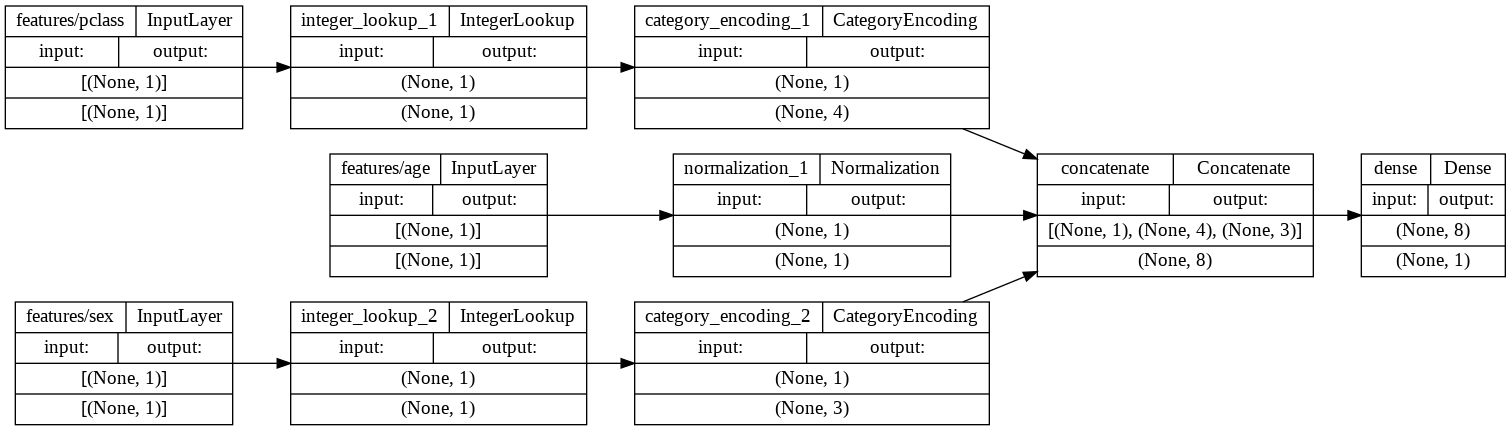

In [10]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [11]:
def train_and_save_model(epochs=10, target='survived', save_as='titanic_classifier'):
  df= get_data(verbose=0)
  train_ds, val_ds, test_ds = prepare_train_val_test_ds(df, target, shuffle=True, 
  val_frac=0.2, test_frac=0.2, batch_size=2, verbose=0)  
  all_inputs, feature_encoded_layers = \
  create_inputs_and_features(train_ds, numerical_features, categorical_features)
  model = make_model(all_inputs, feature_encoded_layers)
  model.fit(train_ds, epochs=epochs, validation_data=val_ds)
  model.save(save_as)
  return model, train_ds, val_ds, test_ds

if True:
  model, train_ds, val_ds, test_ds = train_and_save_model(10, TARGET)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['features/boat', 'features/body', 'features/cabin', 'features/embarked', 'features/fare', 'features/home.dest', 'features/name', 'features/parch', 'features/sibsp', 'features/ticket'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


314/314 [==============================] - 2s 4ms/step - loss: 0.5408 - accuracy: 0.7592 - val_loss: 0.5191 - val_accuracy: 0.7560
Epoch 2/10
314/314 [==============================] - 1s 3ms/step - loss: 0.5147 - accuracy: 0.7719 - val_loss: 0.4996 - val_accuracy: 0.7656
Epoch 3/10
314/314 [==============================] - 1s 3ms/step - loss: 0.5008 - accuracy: 0.7735 - val_loss: 0.4885 - val_accuracy: 0.7751
Epoch 4/10
314/314 [==============================] - 1s 3ms/step - loss: 0.4924 - accuracy: 0.7799 - val_loss: 0.4813 - val_accuracy: 0.7895
Epoch 5/10
314/314 [==============================] - 1s 3ms/step - loss: 0.4870 - accuracy: 0.7847 - val_loss: 0.4765 - val_accuracy: 0.7895
Epoch 6/10
314/314 [==============================] - 1s 3ms/step - loss: 0.4831 - accuracy: 0.7847 - val_loss: 0.4730 - val_accuracy: 0.7895
Epoch 7/10
314/314 [==============================] - 1s 3ms/step - loss: 0.4804 - accuracy: 0.7847 - val_loss: 0.4703 - val_accuracy: 0.7943
Epoch 8/10
314/31

INFO:tensorflow:Assets written to: titanic_classifier/assets


INFO:tensorflow:Assets written to: titanic_classifier/assets


In [12]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

105/105 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7619
Accuracy 0.761904776096344


In [13]:
reloaded_model = tf.keras.models.load_model('titanic_classifier')

In [14]:
new_sample = {
    'features/age': 55,
    'features/pclass': 3,
    'features/sex': 0,
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in new_sample.items()}
predictions = reloaded_model.predict(input_dict)

# Since the output is just logits, not yet gone through the sigmoid, 
# we predict probability of survical by feeding into sigmoid for 0/1 binary decision.
prob = tf.nn.sigmoid(predictions[0])

print(f"This passenger had a {prob[0]*100:.2f} pct probability of surviving.")

This passenger had a 20.62 pct probability of surviving.
